<a href="https://colab.research.google.com/github/DSabarish/GlobalDemographicAnalysis/blob/main/wip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3
import pandas as pd

In [2]:
def pd_to_sqlDB(input_df: pd.DataFrame,
                table_name: str,
                db_name: str = 'default.db') -> None:

    '''Take a Pandas dataframe `input_df` and upload it to `table_name` SQLITE table
    Args:
        input_df (pd.DataFrame): Dataframe containing data to upload to SQLITE
        table_name (str): Name of the SQLITE table to upload to
        db_name (str, optional): Name of the SQLITE Database in which the table is created.
                                 Defaults to 'default.db'.
    '''

    # Step 1: Setup local logging
    import logging
    logging.basicConfig(level=logging.INFO,
                        format='%(asctime)s %(levelname)s: %(message)s',
                        datefmt='%Y-%m-%d %H:%M:%S')

    # Step 2: Find columns in the dataframe
    cols = input_df.columns
    cols_string = ','.join(cols)
    val_wildcard_string = ','.join(['?'] * len(cols))

    # Step 3: Connect to a DB file if it exists, else crete a new file
    con = sqlite3.connect(db_name)
    cur = con.cursor()
    logging.info(f'SQL DB {db_name} created')

    # Step 4: Create Table
    sql_string = f"""CREATE TABLE {table_name} ({cols_string});"""
    cur.execute(sql_string)
    logging.info(f'SQL Table {table_name} created with {len(cols)} columns')

    # Step 5: Upload the dataframe
    rows_to_upload = input_df.to_dict(orient='split')['data']
    sql_string = f"""INSERT INTO {table_name} ({cols_string}) VALUES ({val_wildcard_string});"""
    cur.executemany(sql_string, rows_to_upload)
    logging.info(f'{len(rows_to_upload)} rows uploaded to {table_name}')

    # Step 6: Commit the changes and close the connection
    con.commit()
    con.close()

In [3]:
def sql_query_to_pd(sql_query_string: str, db_name: str ='default.db') -> pd.DataFrame:
    '''Execute an SQL query and return the results as a pandas dataframe
    Args:
        sql_query_string (str): SQL query string to execute
        db_name (str, optional): Name of the SQLITE Database to execute the query in.
                                 Defaults to 'default.db'.
    Returns:
        pd.DataFrame: Results of the SQL query in a pandas dataframe
    '''
    # Step 1: Connect to the SQL DB
    con = sqlite3.connect(db_name)

    # Step 2: Execute the SQL query
    cursor = con.execute(sql_query_string)

    # Step 3: Fetch the data and column names
    result_data = cursor.fetchall()
    cols = [description[0] for description in cursor.description]

    # Step 4: Close the connection
    con.close()

    # Step 5: Return as a dataframe
    return pd.DataFrame(result_data, columns=cols)

In [61]:
# Step 1: Read the csv file into a dataframe
input_df = pd.read_csv('https://raw.githubusercontent.com/DSabarish/GlobalDemographicAnalysis/main/data.csv')



In [5]:
# Step 2: Upload the dataframe to a SQL Table
pd_to_sqlDB(input_df,
            table_name='WorldData',
            db_name='default.db')



In [6]:
# Step 3: Write the SQL query in a string variable
sql_query_string = """
    SELECT * from WorldData
"""

# Step 4: Exectue the SQL query
result_df = sql_query_to_pd(sql_query_string, db_name='default.db')
result_df

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623


In [7]:
input_df

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623


In [8]:
sql_query_string = """

    SELECT country, count(1)
    from WorldData
    group by country

"""

# Step 4: Exectue the SQL query
result_df = sql_query_to_pd(sql_query_string, db_name='default.db')
result_df

,country,count(1)
0,Afghanistan,12
1,Albania,12
2,Algeria,12
3,Angola,12
4,Argentina,12
...,...,...
137,Vietnam,12
138,West Bank and Gaza,12
139,"Yemen, Rep.",12
140,Zambia,12


In [9]:
# SQL > unique countries
sql_query_string = """

    SELECT distinct country from WorldData

"""

# Step 4: Exectue the SQL query
result_df = sql_query_to_pd(sql_query_string, db_name='default.db')
result_df

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Argentina
...,...
137,Vietnam
138,West Bank and Gaza
139,"Yemen, Rep."
140,Zambia


In [10]:
# Pandas > unique countries

input_df["country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [11]:
# unique number of coutries
sql_query_string = """

    SELECT count(distinct country) from WorldData

"""

# Step 4: Exectue the SQL query
result_df = sql_query_to_pd(sql_query_string, db_name='default.db')
result_df

,count(distinct country)
0,142


In [12]:
# unique number of coutries

# l=input_df["country"].unique()

# len(l)

input_df["country"].unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [13]:
# SQL > count of each country
sql_query_string = """

    SELECT country, count(*) from WorldData group by country

"""

# Step 4: Exectue the SQL query
result_df = sql_query_to_pd(sql_query_string, db_name='default.db')
result_df.sample(5)

,country,count(*)
73,Lesotho,12
87,Myanmar,12
140,Zambia,12
37,Ecuador,12
71,Kuwait,12


In [14]:

input_df.groupby("country").agg({"country":"count"})


# A = input_df["country"]
# agg_result = A.groupby(A).agg({"country": "sum"})


,country
country,
Afghanistan,12
Albania,12
Algeria,12
Angola,12
Argentina,12
...,...
Vietnam,12
West Bank and Gaza,12
"Yemen, Rep.",12


In [15]:
# SQL >  📅 What is the range of years covered in the dataset?

sql_query_string = """

    SELECT
            max(year)-min(year) as year_range
    FROM WorldData

"""

# Step 4: Exectue the SQL query
result_df = sql_query_to_pd(sql_query_string, db_name='default.db')
result_df.head(5)

,year_range
0,55


In [16]:
min_year = input_df["year"].min()
max_year = input_df["year"].max()

max_year-min_year



55

In [17]:
# SQL >  🌐 Which continents are represented in the dataset?

sql_query_string = """

    SELECT
            distinct continent
    FROM WorldData

"""

# Step 4: Exectue the SQL query
result_df = sql_query_to_pd(sql_query_string, db_name='default.db')
result_df.head(5)

,continent
0,Asia
1,Europe
2,Africa
3,Americas
4,Oceania


In [18]:
# Pandas >  🌐 Which continents are represented in the dataset?

input_df["continent"].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [19]:
# SQL >  🧑‍🤝‍🧑 What is the average population across all countries in the dataset?

sql_query_string = """

    SELECT
            avg(population) as average_population
    FROM WorldData

"""

# Step 4: Exectue the SQL query
result_df = sql_query_to_pd(sql_query_string, db_name='default.db')
result_df.head(5)

,average_population
0,2.960121e+07


In [20]:
input_df["population"].mean()

29601212.324530516

In [21]:
# SQL >  🧑‍🤝‍🧑 What is the average population across all countries in the dataset?

sql_query_string = """

    SELECT
            country, avg(population) as average_population
    FROM WorldData
    Group by country

"""

# Step 4: Exectue the SQL query
result_df = sql_query_to_pd(sql_query_string, db_name='default.db')
result_df.head(5)

,country,average_population
0,Afghanistan,1.582372e+07
1,Albania,2.580249e+06
2,Algeria,1.987541e+07
3,Angola,7.309390e+06
4,Argentina,2.860224e+07


In [22]:
# Pandas >  🧑‍🤝‍🧑 What is the average population across all countries in the dataset?

result_df=input_df.groupby("country").agg({"population":"mean"})

result_df.head(5)

,population
country,
Afghanistan,1.582372e+07
Albania,2.580249e+06
Algeria,1.987541e+07
Angola,7.309390e+06
Argentina,2.860224e+07


In [23]:
# SQL >  📈 Which country has the highest population in the latest year available?

sql_query_string = """

    SELECT
            *
    FROM WorldData
    where  year = (select max(year) from WorldData)
    order by population desc
    limit 1

"""

# Step 4: Exectue the SQL query
result_df = sql_query_to_pd(sql_query_string, db_name='default.db')
result_df.head(10)

,country,year,population,continent,life_exp,gdp_cap
0,China,2007,1318683096,Asia,72.961,4959.114854


In [24]:
# Pandas >  📈 Which country has the highest population in the latest year available?


mask = input_df["year"] == input_df["year"].max()

mask  # it contails true for all 2007 records

result_df =    input_df[mask].sort_values(  "population"   ,    ascending = False      )


result_df.head(1)

,country,year,population,continent,life_exp,gdp_cap
299,China,2007,1318683096,Asia,72.961,4959.114854


In [47]:


# SQL >  📊 How has the population of a specific country changed over the years?  --- > India

sql_query_string = """


SELECT
    *,
    LAG(population, 1) OVER (ORDER BY year ASC) AS prev_year_pop,
    (population - LAG(population, 1) OVER (ORDER BY year ASC)) AS percentage_difference_in_pop
FROM
    WorldData
WHERE
    country = 'India';






"""

# Step 4: Exectue the SQL query
result_df = sql_query_to_pd(sql_query_string, db_name='default.db')
result_df

,country,year,population,continent,life_exp,gdp_cap,prev_year_pop,percentage_difference_in_pop
0,India,1952,372000000,Asia,37.373,546.565749,NaN,NaN
1,India,1957,409000000,Asia,40.249,590.061996,3.720000e+08,37000000.0
2,India,1962,454000000,Asia,43.605,658.347151,4.090000e+08,45000000.0
3,India,1967,506000000,Asia,47.193,700.770611,4.540000e+08,52000000.0
4,India,1972,567000000,Asia,50.651,724.032527,5.060000e+08,61000000.0
5,India,1977,634000000,Asia,54.208,813.337323,5.670000e+08,67000000.0
6,India,1982,708000000,Asia,56.596,855.723538,6.340000e+08,74000000.0
7,India,1987,788000000,Asia,58.553,976.512676,7.080000e+08,80000000.0
8,India,1992,872000000,Asia,60.223,1164.406809,7.880000e+08,84000000.0
9,India,1997,959000000,Asia,61.765,1458.817442,8.720000e+08,87000000.0


In [26]:


# SQL >  📊 How has the population of a specific country changed over the years?  --- > India

sql_query_string = """



SELECT
    w1.*,
    w2.population AS prev_year_pop,
    w1.population - w2.population AS percentage_prev_year_pop

FROM
    WorldData w1
LEFT JOIN
    WorldData w2 ON w1.country = w2.country AND w1.year = w2.year+5
WHERE
    w1.country = 'India'
ORDER BY
    w1.year ASC;


"""

# Step 4: Exectue the SQL query
result_df = sql_query_to_pd(sql_query_string, db_name='default.db')
result_df

,country,year,population,continent,life_exp,gdp_cap,prev_year_pop,percentage_prev_year_pop
0,India,1952,372000000,Asia,37.373,546.565749,NaN,NaN
1,India,1957,409000000,Asia,40.249,590.061996,3.720000e+08,37000000.0
2,India,1962,454000000,Asia,43.605,658.347151,4.090000e+08,45000000.0
3,India,1967,506000000,Asia,47.193,700.770611,4.540000e+08,52000000.0
4,India,1972,567000000,Asia,50.651,724.032527,5.060000e+08,61000000.0
5,India,1977,634000000,Asia,54.208,813.337323,5.670000e+08,67000000.0
6,India,1982,708000000,Asia,56.596,855.723538,6.340000e+08,74000000.0
7,India,1987,788000000,Asia,58.553,976.512676,7.080000e+08,80000000.0
8,India,1992,872000000,Asia,60.223,1164.406809,7.880000e+08,84000000.0
9,India,1997,959000000,Asia,61.765,1458.817442,8.720000e+08,87000000.0


In [48]:


# pandas >  📊 How has the population of a specific country changed over the years?  --- > India


# import pandas as pd


# input_df = input_df[input_df["country"]=="India"]

# input_df["prev_population"] = input_df["population"].shift(+1)

# input_df
# ------------------------------------

import pandas as pd



input_df = input_df[input_df['country'] == 'India']   # from , where

input_df = input_df.sort_values(by='year')             # order by year

input_df['prev_year_pop'] = input_df['population'].shift(+1)   # lag(year,1)

input_df['percentage_difference_in_pop'] = (input_df['population'] - input_df['prev_year_pop']) / input_df['prev_year_pop'] * 100

input_df







# Step 4: Exectue the SQL query
# result_df = sql_query_to_pd(sql_query_string, db_name='default.db')
# result_df

,country,year,population,continent,life_exp,gdp_cap,prev_year_pop,percentage_difference_in_pop
696,India,1952,372000000,Asia,37.373,546.565749,NaN,NaN
697,India,1957,409000000,Asia,40.249,590.061996,3.720000e+08,9.946237
698,India,1962,454000000,Asia,43.605,658.347151,4.090000e+08,11.002445
699,India,1967,506000000,Asia,47.193,700.770611,4.540000e+08,11.453744
700,India,1972,567000000,Asia,50.651,724.032527,5.060000e+08,12.055336
701,India,1977,634000000,Asia,54.208,813.337323,5.670000e+08,11.816578
702,India,1982,708000000,Asia,56.596,855.723538,6.340000e+08,11.671924
703,India,1987,788000000,Asia,58.553,976.512676,7.080000e+08,11.299435
704,India,1992,872000000,Asia,60.223,1164.406809,7.880000e+08,10.659898
705,India,1997,959000000,Asia,61.765,1458.817442,8.720000e+08,9.977064


In [78]:


# Step 1: Read the csv file into a dataframe
input_df = pd.read_csv('https://raw.githubusercontent.com/DSabarish/GlobalDemographicAnalysis/main/data.csv')


# import pandas as pd

# # Assuming you have a DataFrame named input_df with columns 'year', 'country', and 'population'
# df1 = input_df

# # Filter the DataFrame for 'India'
# df_india = df1[df1['country'] == 'India']

# # Merge the DataFrame with itself shifted by 5 years
# merged_df = df_india.merge(
#     df_india.shift(5),
#     left_on='year',
#     right_on='year',
#     suffixes=('', '_prev_year'),
#     how='left'
# )

# # Calculate the population difference
# merged_df['population_diff'] = merged_df['population'] - merged_df['population_prev_year']

# # Display the merged DataFrame
# merged_df








In [28]:
# SQL >  ❤️ What is the average life expectancy across all countries and years?
sql_query_string = """


SELECT
  country, year , avg(life_exp)
FROM
  WorldData
group by country, year



"""

# Step 4: Exectue the SQL query
result_df = sql_query_to_pd(sql_query_string, db_name='default.db')
result_df.head(5)

,country,year,avg(life_exp)
0,Afghanistan,1952,28.801
1,Afghanistan,1957,30.332
2,Afghanistan,1962,31.997
3,Afghanistan,1967,34.020
4,Afghanistan,1972,36.088


In [29]:
# Pandas >  ❤️ What is the average life expectancy across all countries and years?

result_df = input_df.groupby(["country", "year" ]).agg({"life_exp":"mean"})


result_df.head()

life_exp
country     year          
Afghanistan 1952    28.801
            1957    30.332
            1962    31.997
            1967    34.020
            1972    36.088

In [30]:
# SQL >  ❤️ What is the average life expectancy across all countries and years?
sql_query_string = """

SELECT
  *
FROM
  WorldData


"""

# Step 4: Exectue the SQL query
result_df = sql_query_to_pd(sql_query_string, db_name='default.db')
result_df.head(5)

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


In [86]:
# SQL >  🌟 Which country has the highest life expectancy in the latest year available?
sql_query_string = """

SELECT
  *
FROM
  WorldData

"""

# Step 4: Exectue the SQL query
result_df = sql_query_to_pd(sql_query_string, db_name='default.db')
result_df.head(10)

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
5,Afghanistan,1977,14880372,Asia,38.438,786.113360
6,Afghanistan,1982,12881816,Asia,39.854,978.011439
7,Afghanistan,1987,13867957,Asia,40.822,852.395945
8,Afghanistan,1992,16317921,Asia,41.674,649.341395
9,Afghanistan,1997,22227415,Asia,41.763,635.341351


In [97]:
# SQL >  🌟
# Which country has the highest life expectancy in the latest year available?
sql_query_string = """

SELECT
  max(life_exp)
FROM
  WorldData
Where year = (select max(year) from WorldData)

"""

# Step 4: Exectue the SQL query
result_df = sql_query_to_pd(sql_query_string, db_name='default.db')
result_df.head(5)

,max(life_exp)
0,82.603


In [103]:
# Pandas >  🌟 Which country has the highest life expectancy in the latest year available?
import pandas as pd
# Step 1: Read the csv file into a dataframe
# input_df = pd.read_csv('https://raw.githubusercontent.com/DSabarish/GlobalDemographicAnalysis/main/data.csv')
df1=input_df

filter_mask = df1[    "year"     ] == df1[    "year"     ].max()

df1[filter_mask]


,country,year,population,continent,life_exp,gdp_cap
11,Afghanistan,2007,31889923,Asia,43.828,974.580338
23,Albania,2007,3600523,Europe,76.423,5937.029526
35,Algeria,2007,33333216,Africa,72.301,6223.367465
47,Angola,2007,12420476,Africa,42.731,4797.231267
59,Argentina,2007,40301927,Americas,75.320,12779.379640
...,...,...,...,...,...,...
1655,Vietnam,2007,85262356,Asia,74.249,2441.576404
1667,West Bank and Gaza,2007,4018332,Asia,73.422,3025.349798
1679,"Yemen, Rep.",2007,22211743,Asia,62.698,2280.769906
1691,Zambia,2007,11746035,Africa,42.384,1271.211593


In [112]:
## - ⏳ How has the life expectancy changed over the years for a specific country or continent?
import pandas as pd
# Step 1: Read the csv file into a dataframe
# input_df = pd.read_csv('https://raw.githubusercontent.com/DSabarish/GlobalDemographicAnalysis/main/data.csv')
df1 = input_df

country_cond = (df1["country"]=="India")   #-->true/false

df_india_sorted = df1[country_cond].sort_values(by="year",ascending=True)

df_india_sorted




,country,year,population,continent,life_exp,gdp_cap
696,India,1952,372000000,Asia,37.373,546.565749
697,India,1957,409000000,Asia,40.249,590.061996
698,India,1962,454000000,Asia,43.605,658.347151
699,India,1967,506000000,Asia,47.193,700.770611
700,India,1972,567000000,Asia,50.651,724.032527
701,India,1977,634000000,Asia,54.208,813.337323
702,India,1982,708000000,Asia,56.596,855.723538
703,India,1987,788000000,Asia,58.553,976.512676
704,India,1992,872000000,Asia,60.223,1164.406809
705,India,1997,959000000,Asia,61.765,1458.817442


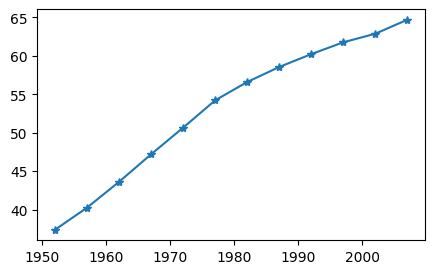

In [117]:

import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
x_axis = df_india_sorted['year']
y_axis = df_india_sorted['life_exp']

plt.plot(x_axis,y_axis , marker='*', linestyle='-')

In [131]:
# 💰 What is the average GDP per capita across all countries and years?

import pandas as pd
# input_df = pd.read_csv('https://raw.githubusercontent.com/DSabarish/GlobalDemographicAnalysis/main/data.csv')
df1 = input_df


sql_query_string = """

SELECT country, avg(gdp_cap)
FROM WorldData
group by country


"""

# Step 4: Exectue the SQL query
result_df = sql_query_to_pd(sql_query_string, db_name='default.db')
result_df.head(5)


,country,avg(gdp_cap)
0,Afghanistan,802.674598
1,Albania,3255.366633
2,Algeria,4426.025973
3,Angola,3607.100529
4,Argentina,8955.553783


In [146]:
# 💰 What is the average GDP per capita across all countries and years?

import pandas as pd
# input_df = pd.read_csv('https://raw.githubusercontent.com/DSabarish/GlobalDemographicAnalysis/main/data.csv')
df1 = input_df

agg_dict = {"gdp_cap":"mean"}
result_df = df1.groupby("country").agg(agg_dict)

result_df.head(10)


,gdp_cap
country,
Afghanistan,802.674598
Albania,3255.366633
Algeria,4426.025973
Angola,3607.100529
Argentina,8955.553783
Australia,19980.595634
Austria,20411.916279
Bahrain,18077.663945
Bangladesh,817.558818
